In [1]:
import numpy as np;
import pandas as pd

df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
X = df[['Annual Income (k$)','Spending Score (1-100)','Age']]

from sklearn.discriminant_analysis import StandardScaler

scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
inertia= []
K_range = range(1,11)

from sklearn.cluster import KMeans

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

In [14]:
from matplotlib import pyplot as plt


plt.plot(K_range.inertia,'bo-')
plt.xlable('Number of cluster (k)')
plt.ylable('inertia_')
plt.title('elbow method for optimal K')
plt.grid(True)


AttributeError: 'range' object has no attribute 'inertia'

In [16]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k,random_state=42)
y_kmeans=kmeans.fit_predict(X_pca)

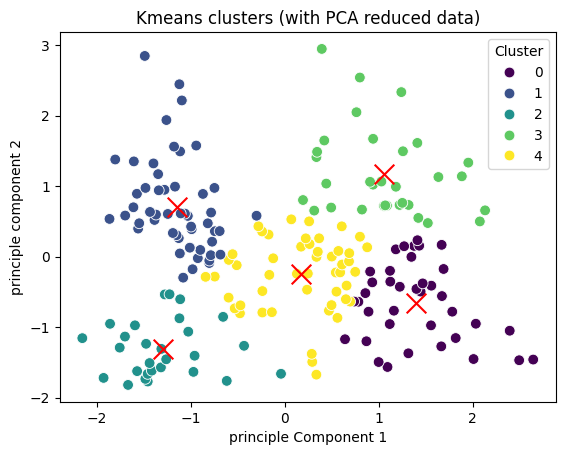

In [18]:
import seaborn as sns

sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y_kmeans,palette='viridis',s=60)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,color='red',marker='x')
plt.title('Kmeans clusters (with PCA reduced data)')
plt.xlabel('principle Component 1')
plt.ylabel('principle component 2')
plt.legend(title='Cluster')